In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [122]:
df = sns.load_dataset("tips")

In [5]:
df["tip"]

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [6]:
# Binning

In [8]:
df["tip"].min(), df["tip"].max()

(np.float64(1.0), np.float64(10.0))

In [142]:
def tip_bin(x):
    if x >= 1 and x <= 3:
        return "Low Tip"
    elif x >= 3 and x <= 7:
        return "Medium Tip"
    else:
        return "High Tip"

In [143]:
df["tip_bins"] = df["tip"].apply(tip_bin)

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,16.99,1.01,Female,No,Sun,Dinner,2,Low Tip
1,10.34,1.66,Male,No,Sun,Dinner,3,Low Tip
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium Tip
3,23.68,3.31,Male,No,Sun,Dinner,2,Medium Tip
4,24.59,3.61,Female,No,Sun,Dinner,4,Medium Tip


In [13]:
# Find the distribution of high tips according to gender

In [21]:
df.set_index("tip_bins").loc["High Tip", "sex"].value_counts()

sex
Male      3
Female    0
Name: count, dtype: int64

In [25]:
df[df["tip_bins"] == "High Tip"].groupby("tip_bins")["sex"].count()

tip_bins
High Tip    3
Name: sex, dtype: int64

In [46]:
# pd.crosstab
# df[df["tip_bins"] == "High Tip"]

(
    pd.crosstab(
        df[df["tip_bins"] == "Medium Tip"]["tip_bins"],
        [
            df[df["tip_bins"] == "Medium Tip"]["sex"],
            df[df["tip_bins"] == "Medium Tip"]["time"],
        ],
        normalize="index",
    )
    * 100
)

sex              Male               Female           
time            Lunch     Dinner     Lunch     Dinner
tip_bins                                             
Medium Tip  10.526316  55.789474  9.473684  24.210526

In [50]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [51]:
df.head()

# Find in which day the tips are lowest and their distribution among sex and time.

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,16.99,1.01,Female,No,Sun,Dinner,2,Low Tip
1,10.34,1.66,Male,No,Sun,Dinner,3,Low Tip
2,21.01,3.50,Male,No,Sun,Dinner,3,Medium Tip
3,23.68,3.31,Male,No,Sun,Dinner,2,Medium Tip
4,24.59,3.61,Female,No,Sun,Dinner,4,Medium Tip


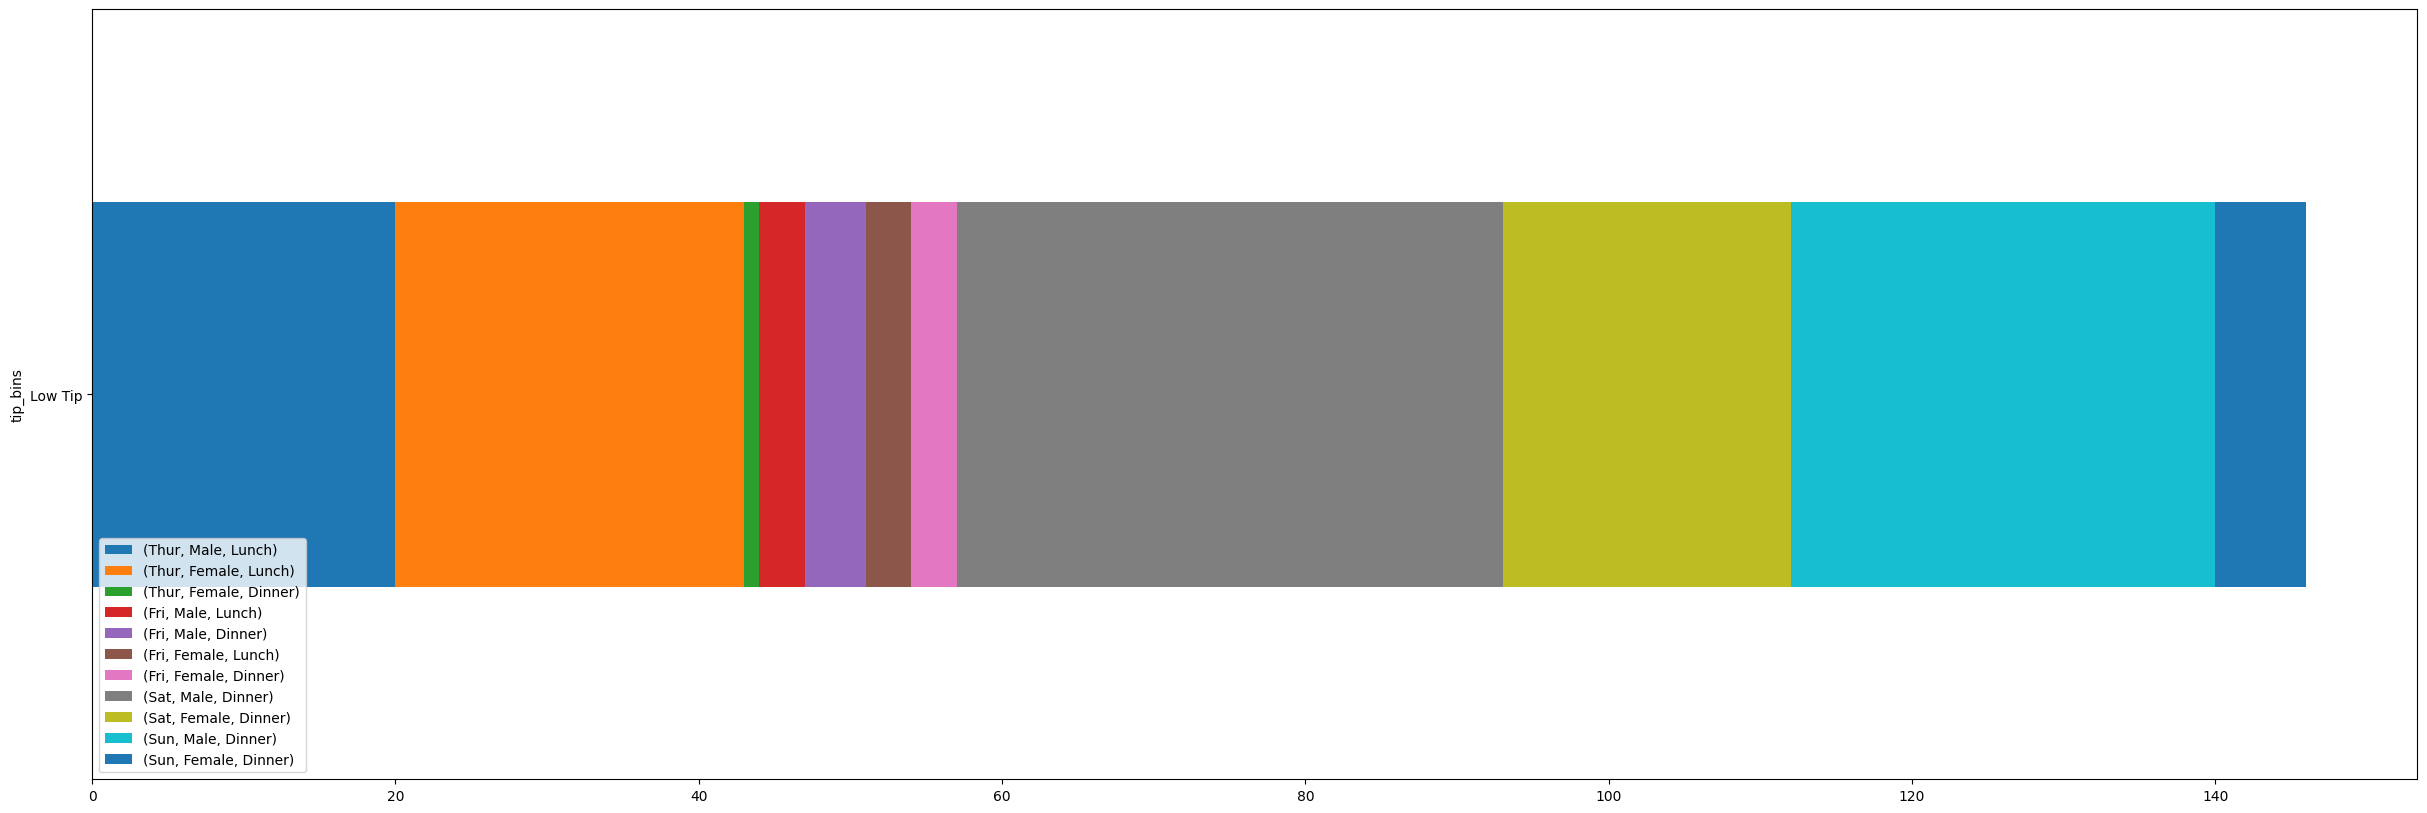

In [59]:
(
    pd.crosstab(
        df[df["tip_bins"] == "Low Tip"]["tip_bins"],
        [
            df[df["tip_bins"] == "Low Tip"]["day"],
            df[df["tip_bins"] == "Low Tip"]["sex"],
            df[df["tip_bins"] == "Low Tip"]["time"],
        ],
        # normalize="index",
    )
).plot(kind="barh", stacked="True", figsize=(30, 10))
plt.legend(loc="lower left")
plt.show()

In [61]:
# find the average price in each bin distibuted among sex

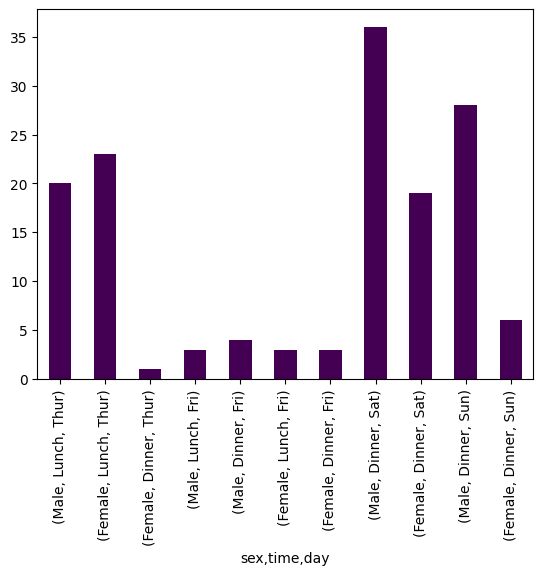

In [98]:
df[df["tip_bins"] == "Low Tip"][["sex", "time", "day"]].value_counts().sort_index(
    level=2
).plot(kind="bar", colormap="viridis")
plt.show()

<Axes: ylabel='tip_bins,sex'>

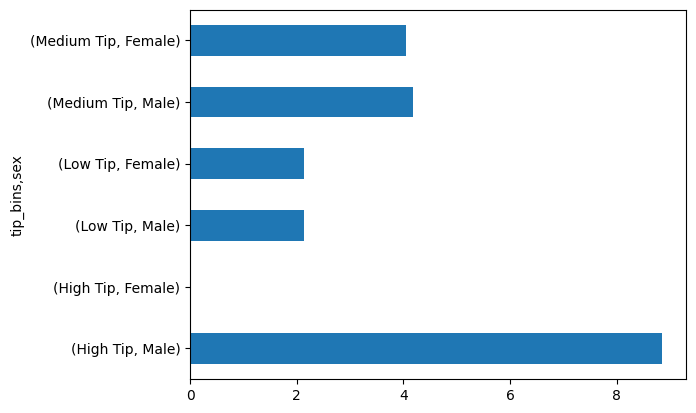

In [116]:
df.groupby(["tip_bins", "sex"], observed=False)["tip"].mean().plot(kind="barh")

In [119]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample DataFrame
# data = {
#     "tip_bins": ["Low", "Low", "Medium", "Medium", "High", "High"],
#     "sex": ["Male", "Female", "Male", "Female", "Male", "Female"],
#     "tip": [5, 7, 10, 12, 15, 18],
# }

# df = pd.DataFrame(data)

# # Compute mean tip values
# grouped = df.groupby(["tip_bins", "sex"], observed=False)["tip"].mean()

# # Create colormap based on tip values
# norm = plt.Normalize(grouped.min(), grouped.max())  # Normalize color scale
# cmap = plt.get_cmap("viridis")  # Choose colormap
# colors = cmap(norm(grouped))  # Map values to colors

# # Plot
# fig, ax = plt.subplots(figsize=(8, 5))
# bars = grouped.plot(kind="barh", color=colors, ax=ax)

# # Add Colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # Dummy array for colorbar
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label("Tip Amount")

# plt.xlabel("Mean Tip")
# plt.title("Mean Tip by Tip Bins and Sex with Colorbar")
# plt.show()

In [120]:
# find if there is any corelation between tips and total bill

<Axes: xlabel='total_bill', ylabel='tip'>

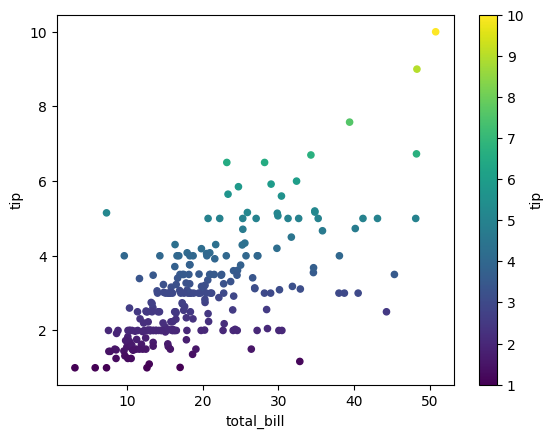

In [130]:
df[["total_bill", "tip"]].plot(
    kind="scatter", x="total_bill", y="tip", c="tip", colormap="viridis"
)

In [131]:
# Find out the if there is any correlation between high tip and high bill to size

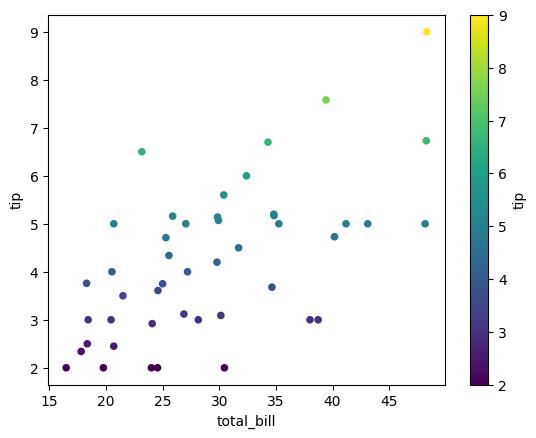

In [141]:
df[df["size"] > df["size"].quantile(0.75)][["total_bill", "tip"]].plot(
    kind="scatter", x="total_bill", y="tip", c="tip", colormap="viridis"
)
plt.show()

<Axes: ylabel='Frequency'>

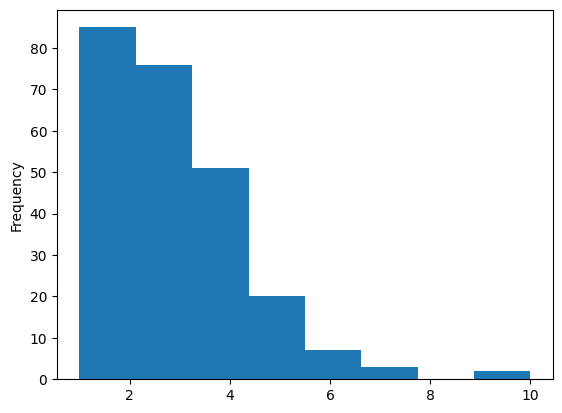

In [160]:
df["tip"].plot(kind="hist", bins=8)

In [161]:
# The End

In [162]:
from sklearn.preprocessing import Binarizer

In [163]:
bn = Binarizer(threshold=df["tip"].quantile(0.75))

In [177]:
# bn.fit_transform(df[["tip"]])

In [171]:
bn = Binarizer(threshold=3)

In [175]:
df["tip_binary"] = bn.fit_transform(df[["tip"]])

In [176]:
df["tip_binary"].value_counts()

tip_binary
0.0    146
1.0     98
Name: count, dtype: int64